In [35]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
%matplotlib inline

iris = load_iris()
print('target name:', iris.target_names)
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [8]:
kmeans.fit_predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [9]:
kmeans.fit_transform(irisDF)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

In [24]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_

iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [25]:
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]

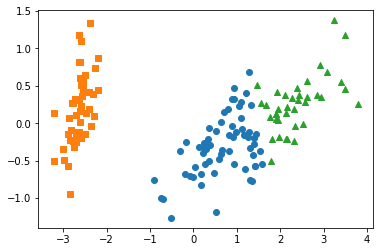

In [31]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind,'pca_y'], marker ='o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind,'pca_y'], marker ='s')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind,'pca_y'], marker ='^')

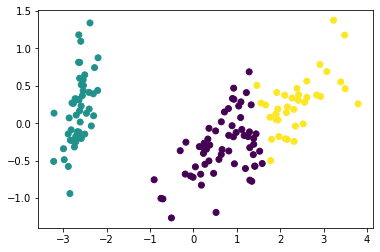

In [33]:
plt.scatter(x = irisDF.loc[:,'pca_x'], y=irisDF.loc[:,'pca_y'], c = irisDF['cluster'])

In [38]:
X,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

(200, 2) (200,)


In [39]:
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

[0 1 2] [67 67 66]


In [40]:
df = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
df['target'] = y
df

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


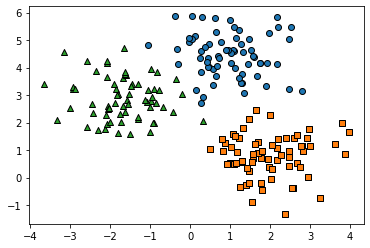

In [42]:
target_list = np.unique(y)
markers=['o','s','^','P','D','H','x']

for target in target_list:
    target_cluster = df[df['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])
plt.show()

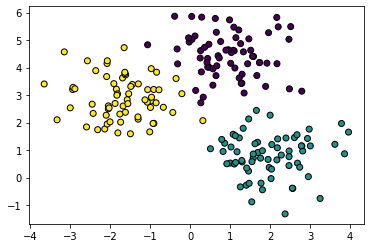

In [44]:
plt.scatter(x=df['ftr1'],y=df['ftr2'], edgecolor = 'k', c = y)

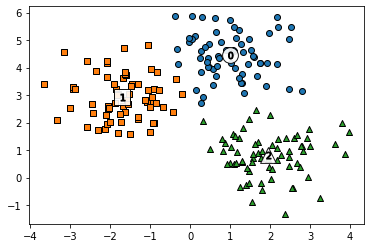

In [60]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
new_feature = kmeans.fit_predict(X)
df['k_means'] = new_feature

centers = kmeans.cluster_centers_
unique_labels = np.unique(new_feature)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster = df[df['k_means']==label]
    center_x_y = centers[label]
    plt.scatter(x= label_cluster['ftr1'], y = label_cluster['ftr2'], marker = markers[label], edgecolor = 'k')
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s = 250, color = 'white', alpha = 0.9, edgecolor='k', marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s = 50, color = 'k',  edgecolor='k', marker = '$%d$' % label)
    # 2번째는 centroid의 하얀색 바탕을 표시함. alpha는 희미해지는 거, edgecolor는 테두리 색, color은 바탕색
    # 3번째는 centroid 내의 까만색 글씨, s는 크기

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [54]:
df

,ftr1,ftr2,target,k_means
0,-1.692427,3.622025,2,2
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,2
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,1
196,-2.074113,4.245523,2,2
197,2.783411,1.151438,1,1
198,1.226724,3.620511,0,0
